## <u> Dispersion Extraction Using FFT Method </u>

## Script information:
- This file is supposed to provide the best method of extracting the difference in spectral phase and then the GVD from OSA traces
- Provide data files from the OSA as csv's
- They will be converted to $\omega$, interpolated and the FFT procedure applied

In [1]:
# ********* Import modules ********* #
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import csv
import pandas as pd
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
add_to_path = os.path.join(parent_directory, "Modules/Refractive_Indices")
os.listdir(parent_directory)
print(add_to_path)
sys.path.append(add_to_path)
import RefractiveIndexClass
from DispersionExtractionClass import DispersionExtraction as de


c:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\Modules/Refractive_Indices


-0.0142


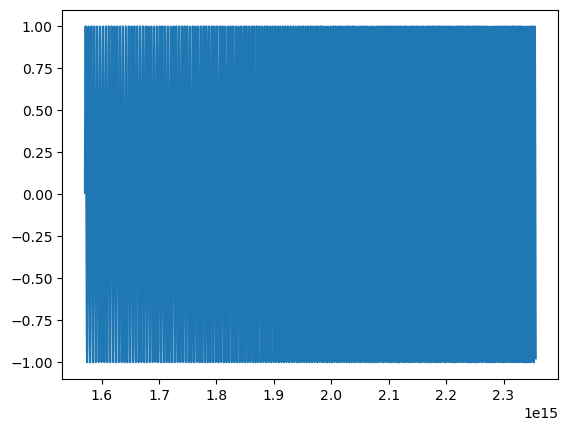

In [2]:
# Generate data:
import numpy as np
wavelengths = np.linspace(800, 1200, 10000)
omegas = 2 * np.pi * 3e17 / np.array(wavelengths)
omegas = np.linspace(max(omegas), min(omegas), len(wavelengths))
L_f = 0.01
DeltaL_air = - L_f * RefractiveIndexClass.RefractiveIndex.n_group(RefractiveIndexClass.RefractiveIndex.n_fs, 500) 
DeltaL_air = - 0.0142
print(DeltaL_air)
n_f = RefractiveIndexClass.RefractiveIndex.n_fs(wavelengths)
phase = (omegas / 3e8) * (DeltaL_air + L_f * n_f)
plt.plot(omegas, np.cos(phase))
cos_phi = np.cos(phase) + 1
omegas2 = omegas

##### Read OSA data (in wavelengths) from a CSV

In [3]:
import os
import time
import re
import pandas as pd
import matplotlib.pyplot as plt

# Path to the directory containing CSV files
#directory_path = '/Users/jackmorse/Documents/University/Year 4/FYP/Data/21-Feb-2024/csv/'
directory_path = r'C:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\LabData'

# Get a list of CSV files in the directory
csv_files = sorted([file for file in os.listdir(directory_path) if file.endswith('.csv')])
print(csv_files)
total_files = len(csv_files)

# Loop through each CSV file
# for i, csv_file in enumerate(csv_files, start=1):
#     file_path = os.path.join(directory_path, csv_file)

#     # Read CSV file into a DataFrame
#     data = pd.read_csv(file_path, header = None)

#     # Plot the data
#     plt.plot(data[0], data[1])
    
#     # Set plot title
#     match = re.search(r'\d+of\d+', csv_file)
#     title_pattern = match.group() if match else f"NoPatternFound_{i}"

#     plt.title(f"{title_pattern}")

#     # Show the plot
#     plt.show()

#     # Pause for 1 second before the next iteration
#     # time.sleep(1)



['HCF_120cm_16of40_61510um_Jack_21022024_1019.csv']


OSA Spectrum Full: 


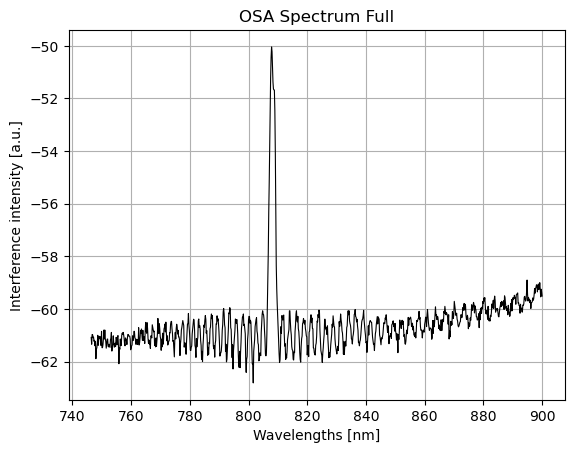

OSA Spectrum: 


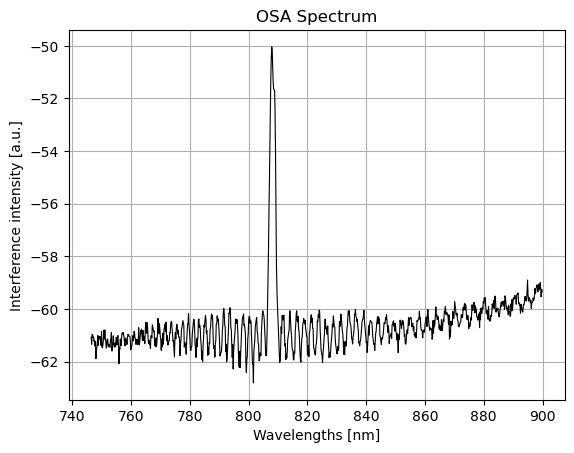

OSA Spectrum in Omega after Linear Interpolation: 


Text(0, 0.5, 'Interference intensity [a.u.]')

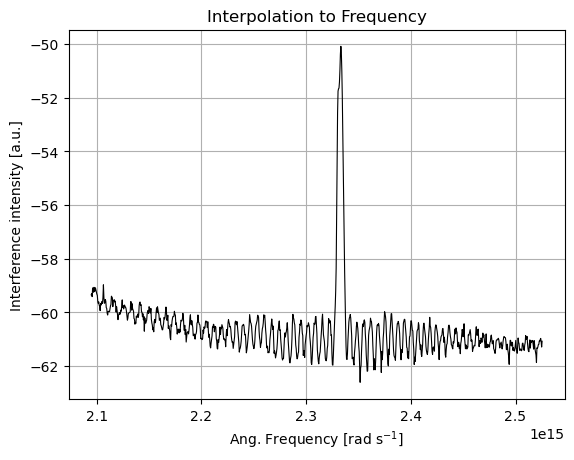

In [4]:
# Provide data:
data_set = "b6"
#interference_data_path =  "/Users/jackmorse/Documents/University/Year 4/FYP/Data/21-Feb-2024/csv/HCF_120cm_16of40_61510um_Jack_21022024_1019.csv" # "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Sample-Data-1/" + data_set + "_fringes.csv"
interference_data_path = r'C:\Users\met50\OneDrive - University of Bath\Uni\Final Year\Project\Cleaned_FYP_Repo\LabData\HCF_120cm_16of40_61510um_Jack_21022024_1019.csv'
reference_data_path = "" # "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Sample-Data-1/" + data_set + "_ref.csv"
fibre_data_path = "" # "/Users/jackmorse/Documents/University/Year 4/FYP/Physics-FYP/Sample-Data-1/" + data_set + "_signal.csv"
min_wavelength = 740
max_wavelength = 900
c = 3e17                                                        # SOL in nm / s
skiprows = 40
xlim = None

# Interference, reference and fibre read in:
data = pd.read_csv(interference_data_path, header=None, skiprows=skiprows)
fringes_x = data[0]
fringes_y = data[1]

if reference_data_path != "":
    data = pd.read_csv(reference_data_path, header=None, skiprows=skiprows)
    ref_x = data[0]
    ref_y = data[1]

if fibre_data_path != "":
    data = pd.read_csv(fibre_data_path, header=None, skiprows=skiprows)
    signal_x = data[0]
    signal_y = data[1]

# Restrict and divide by reference and fibre arms
idx = np.where((fringes_x > min_wavelength) & (fringes_x < max_wavelength))[0]
wavelengths = fringes_x[idx]
if (reference_data_path != "" and fibre_data_path != ""):
    show_all_traces = True 
    if show_all_traces:
        print("All OSA traces")
        plt.plot(fringes_x, fringes_y, color = 'r', linewidth = 0.8, label = "Fringes")
        plt.plot(signal_x, signal_y, color = 'g', linewidth = 0.8, label = "Signal")
        plt.plot(ref_x, ref_y, color = 'b', linewidth = 0.8, label = "Reference")
        plt.grid()
        plt.legend()
        plt.title("OSA All Traces")
        plt.xlabel("Wavelengths [nm]")
        plt.ylabel("Interference intensity [a.u.]")
        if xlim is not None:
            plt.xlim(xlim)
        plt.show()
    correlation_product_intensity = ((fringes_y - ref_y - signal_y) + np.sqrt(ref_y * signal_y)) /(2 * np.sqrt(ref_y * signal_y))
    print("OSA Spectrum Full: ")
    plt.plot(fringes_x, correlation_product_intensity, color = 'k', linewidth = 0.8, label = "Scaled")       
    plt.grid()
    plt.title("OSA Spectrum Full")
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("Interference intensity [a.u.]")
    plt.legend()
    if xlim is not None:
            plt.xlim(xlim)
    plt.show()
    intensity = correlation_product_intensity[idx]
else:
    intensity = fringes_y[idx]
    print("OSA Spectrum Full: ")
    plt.plot(fringes_x, fringes_y, color = 'k', linewidth = 0.8)
    plt.grid()
    plt.title("OSA Spectrum Full")
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("Interference intensity [a.u.]")
    plt.show()


print("OSA Spectrum: ")
plt.plot(wavelengths, intensity, color = 'k', linewidth = 0.8)
plt.grid()
plt.title("OSA Spectrum")
plt.xlabel("Wavelengths [nm]")
plt.ylabel("Interference intensity [a.u.]")
plt.show()

# Convert from wavelengths to frequency for ease of the FT, using linear interpolation:
def linear_interpolation_omega_wavelength(x, y):
    from scipy import interpolate
    x = 2 * np.pi * c / x                                           # Frequency in rad/s
    x_grid = np.linspace(min(x), max(x), len(y))                    # Adjust the number of points as needed        
    linear_interp = interpolate.interp1d(x, y, kind='linear')       # Perform linear interpolation
    y_interp = linear_interp(x_grid)
    return x_grid, y_interp

omegas, interference_intensity_omega = linear_interpolation_omega_wavelength(wavelengths, intensity)
x = omegas
y = interference_intensity_omega
print("OSA Spectrum in Omega after Linear Interpolation: ")
plt.plot(omegas, interference_intensity_omega, color = 'k', linewidth = 0.8)
plt.grid()
plt.title("Interpolation to Frequency")
plt.xlabel(r"Ang. Frequency [rad s$^{-1}$]")
plt.ylabel("Interference intensity [a.u.]")

#### Scaling the interference using other traces if provided:

In [5]:
# NEEDS WORK, NEED TO INTERPOLATE OTHER DATA TOO
if not (reference_data_path == "" or fibre_data_path == ""):
    pass
    # Scale the interference by dividing by the others in the normal way

##### FFT the data:

960
960
960
960


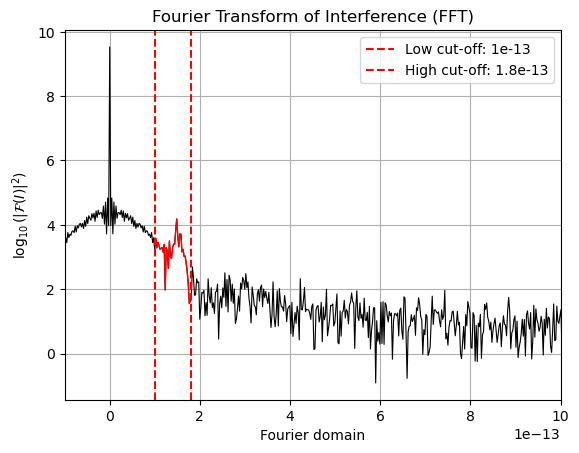

In [6]:
xscale = 1e-12
keep_min_freq =  0.1 * xscale
keep_max_freq = 1.8e-13 # 0.2 * xscale
xlim = [-0.1 * xscale, 1 * xscale]
ylim = None

print(len(x))
print(len(y))
[xf, yf] = de.TraceFFT(x, y, normalise=False, hanning=False) # de.TraceFFT(x = x, y = y, normalise = False, hanning = False)
print(len(yf))
print(len(xf))
plt.plot(xf, np.log10(np.abs(yf)**2), color = 'k', linewidth = 0.8)
plt.axvline(keep_min_freq, color = 'red', linestyle = '--', label= f"Low cut-off: {keep_min_freq}")
if keep_max_freq is not None:
    plt.axvline(keep_max_freq, color = 'red', linestyle = '--', label= f"High cut-off: {keep_max_freq}")
idx = de.FilterIndicesFFT(xf, np.abs(yf), "right", keep_min_freq, keep_max_freq)
filtered_fourier_data = de.BoxFilter(yf, idx)
plt.plot(xf[idx], np.log10(np.abs(filtered_fourier_data[idx])**2), color='red', linewidth = 1)
plt.grid()
plt.legend()
plt.title("Fourier Transform of Interference (FFT)")
plt.xlabel("Fourier domain")
plt.ylabel(r'$\log_{10}(|\mathcal{F}(I)|^2)$')
# plt.ylim([5,6])
if xlim is not None:
    plt.xlim(xlim)
if ylim is not None:
    plt.ylim(ylim)
plt.show()

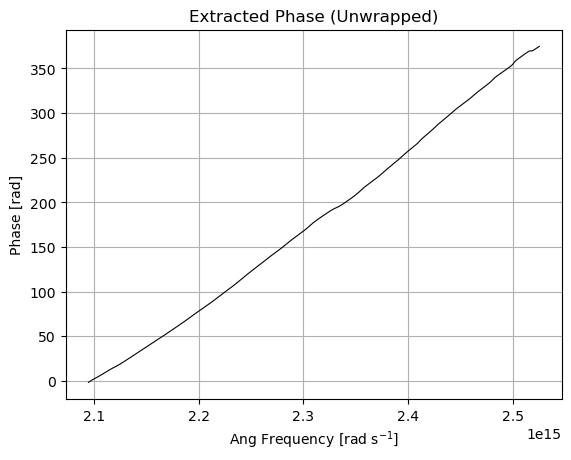

In [7]:
filtered_y = de.InverseFFT(filtered_fourier_data)
final_ys = de.ExtractAndUnwrap(filtered_y)
plt.plot(x, final_ys, color = 'k', linewidth = 0.8)
plt.title("Extracted Phase (Unwrapped)")
plt.ylabel("Phase [rad]")
plt.xlabel(r"Ang Frequency [rad s$^{-1}$]")
plt.grid()
plt.show()

#### Convert back to wavelength from omega:

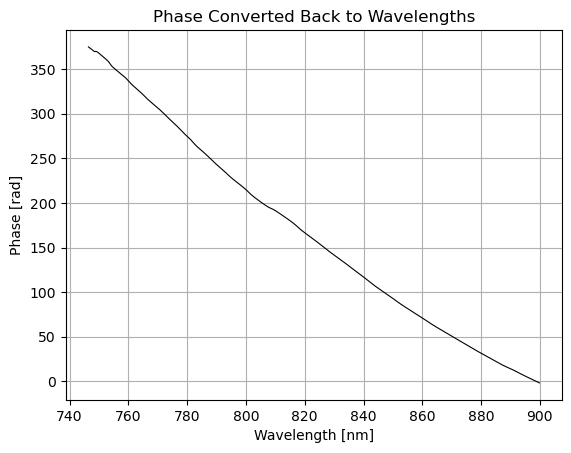

In [8]:
wavelengths, phase = linear_interpolation_omega_wavelength(x, final_ys)
plt.plot(wavelengths, phase, color = 'k', linewidth = 0.8)
plt.title("Phase Converted Back to Wavelengths")
plt.ylabel("Phase [rad]")
plt.xlabel(r"Wavelength [nm]")
plt.grid()
plt.show()

#### Obtain $\beta$ from the phase

Text(0, 0.5, '$\\beta(\\lambda)$ [rad]')

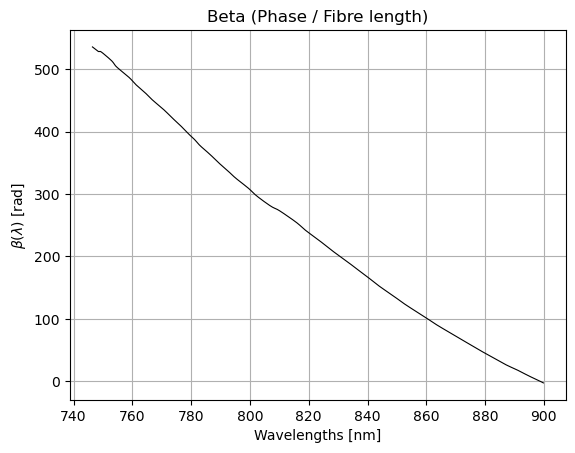

In [9]:
fibre_length = 0.7 
beta_lambda = de.ObtainBetaFromPhi(phase, fibre_length)
plt.plot(wavelengths, beta_lambda, color='k', linewidth = 0.8)
plt.grid()
plt.title("Beta (Phase / Fibre length)")
plt.xlabel("Wavelengths [nm]")
plt.ylabel(r'$\beta(\lambda)$ [rad]')
# plt.xlim([800, 825])
# plt.ylim([0, 150])

In [10]:
def CDA2(func_vals, step_size):
    '''
    Performs the second order derivative using centered difference approximation. FDA and BDA (Ord(h^2)) obtained at https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf
    
    ! Step size must be the same as the grid step. !
    '''
    second_derivative = []
    last_point = len(func_vals) - 1
    second_derivative.append((1 / (step_size**2)) * (2 * func_vals[0] - 5 * func_vals[1] + 4 * func_vals[2] - func_vals[3]))
    # second_derivative.append((1 / (step_size**2)) * (func_vals[2] - 2 * func_vals[1] + func_vals[0])) # If the FDA ever fails use these.
    for i in range(1, last_point):
        second_derivative.append((1 / (step_size**2)) * (func_vals[i + 1] + func_vals[i - 1] - 2 * func_vals[i]))
    # second_derivative.append((1 / (step_size**2)) * (func_vals[last_point] - 2 * func_vals[last_point - 1] + func_vals[last_point - 2])) # If the BDA ever fails use these.
    second_derivative.append((1 / (step_size**2)) * (2 * func_vals[last_point] - 5 * func_vals[last_point - 1] + 4 * func_vals[last_point - 2] - func_vals[last_point - 3]))
    return second_derivative

def CDA1(func_vals, step_size):
    '''
    Performs the second order derivative using centered difference approximation. FDA and BDA (Ord(h^2)) obtained at https://www.dam.brown.edu/people/alcyew/handouts/numdiff.pdf

    ! Step size must be the same as the grid step. !
    '''
    first_derivative = []
    last_point = len(func_vals) - 1
    first_derivative.append((1 / (2 * step_size)) * (-3 * func_vals[0] + 4 * func_vals[1] - func_vals[2] - func_vals[3]))
    for i in range(1, last_point):
        first_derivative.append((1 / (2 * step_size)) * (func_vals[i + 1] - func_vals[i - 1]))
    # first_derivative.append((1 / (step_size)) * (func_vals[last_point] - func_vals[last_point - 1]))
    first_derivative.append((1 / (2 * step_size)) * (3 * func_vals[last_point] - 4 * func_vals[last_point - 1] + func_vals[last_point - 2]))
    return first_derivative

def beta_lambda_func(refractive_index, wavelengths):
    beta = []
    for i in range(len(refractive_index)):
        beta.append(2 * np.pi * refractive_index[i] / wavelengths[i])
    return beta

def GVD_lambda_func(beta, wavelengths, output_ps_nm_km = True):
    '''
    GVD which is expressed as beta_2 * (-2 pi c / lambda**2). Sometimes denoted D.

    Parameters
    -------
    beta ([float]]): Array of beta values in nm^-1
    wavelengths ([float]): Array of wavelengths corresponding to the beta array in nm
    output_ps_nm_km (bool): Output can be given in expected units from input (s / nm*nm) [False] or in conventional (ps / nm*km) [True - Default].

    Returns
    -------
    GVD as an array.
    '''
    c0 = 3e17                                                           # Speed of light in vacuum in nm / s
    first_derivative = CDA1(beta, wavelengths[1] - wavelengths[0])
    second_derivative = CDA2(beta, wavelengths[1] - wavelengths[0])
    GVD = []
    for i in range(len(beta)):
        GVD.append(-1 * ((2 * np.pi * c0) / (wavelengths[i]**2)) * ( ( (wavelengths[i]**3) / (2 * np.pi**2 * c0**2) ) * first_derivative[i] + ( (wavelengths[i]**4) / ((2 * np.pi * c0)**2) ) * second_derivative[i] ) )
    if output_ps_nm_km:
        GVD = np.array(GVD) * 1e24                                      # Converts from s / nm*nm to ps / nm*km (conventional).
    return GVD

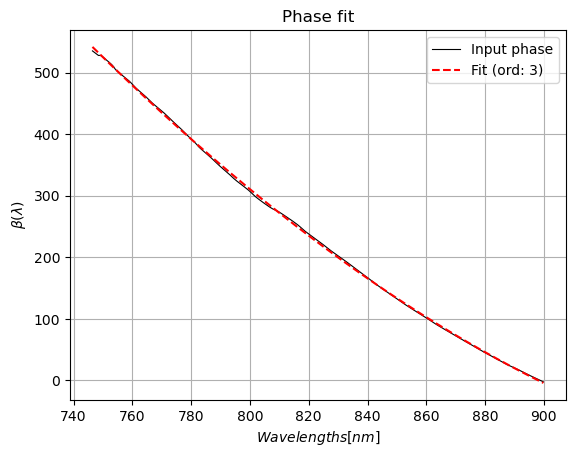

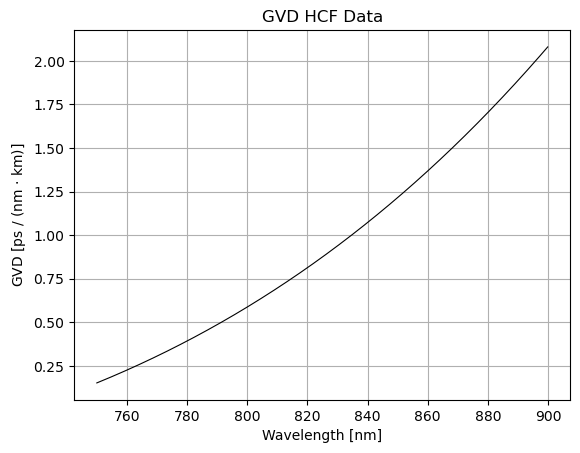

0.0


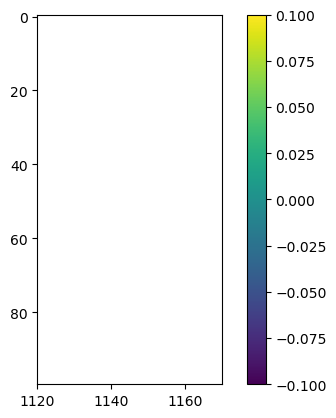

Normalised gap value not a float, defaulting to bessel zero.
j1nz is
3.8317059702075125


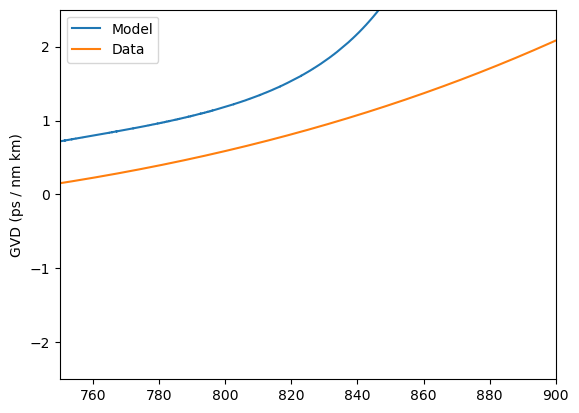

In [11]:
GVD_lambda = de.GVD_lambda(beta_lambda, wavelengths, method = "Fit", order = 3, show_plots = True)
idx = np.where(wavelengths > 750)[0]
plt.plot(wavelengths[idx], GVD_lambda[idx] * 1000, color = 'k', linewidth = 0.8, label = "Data")
plt.grid()
# print(GVD_lambda)
plt.title("GVD HCF Data")
plt.ylabel(r"GVD [ps / (nm $\cdot$ km)]")
plt.xlabel("Wavelength [nm]")
plt.show()
plt.xlim([1120, 1170])



ws = np.linspace(0.1e-6, 0.9e-5, 100)
Rs = np.linspace(20e-6, 30e-6, 100)
global_error = np.zeros((len(ws), len(Rs)))
print(global_error[0, 99])
i = 0
j = 0
best_R = 100000
best_w = 100000
min_error = 10000
# for w in ws:
#     for R in Rs:        
#         print(f"i j = {i}, {j}")
#         refractive_index_HCF = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=wavelengths, R=R, w=w,part="R")
#         beta_HCF = beta_lambda_func(refractive_index_HCF, wavelengths)
#         GVD_HCF = GVD_lambda_func(beta_HCF, wavelengths)
#         current_error = np.sqrt(np.mean((np.array(GVD_HCF) - np.array(GVD_lambda)) ** 2))
#         global_error[i, j] = current_error
#         if current_error < min_error:
#             min_error = current_error
#             best_w = w
#             best_R = R
#         j += 1
#     j = 0
#     i += 1
        
        
plt.imshow(global_error)
plt.colorbar()
# plt.xlim([95, 100])
# plt.ylim([95, 100])
plt.show()
# HCF Model
simulation_wavelengths = np.linspace(600, 1000, 10000)# min(wavelengths), max(wavelengths), 10000)
# index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=best_R, w=best_w,part="R")
index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=24e-6,w=0.9e-6,part="R")
beta_HCF = beta_lambda_func(index, simulation_wavelengths)
GVD_HCF = GVD_lambda_func(beta_HCF, simulation_wavelengths)
plt.plot(simulation_wavelengths, np.array(GVD_HCF), label = "Model")
plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
plt.ylabel("GVD (ps / nm km)")
plt.legend()
plt.xlim([750,900])
#plt.ylim([-10e-9, 10e-9])
plt.ylim(-2.5, 2.5)
plt.show()

In [17]:
from functools import partial
from scipy.optimize import minimize
#HCF_new = partial(RefractiveIndexClass.RefractiveIndex.HCF, wavelengths = wavelengths, mode = [1, 1], n_gas = None, n_wall = None, R = 24e-6, part = "Real", parameter = "wavelength", normalised_gap = True, r_cap = None, M = 6)

def HCF(wavelengths, w):
    RefractiveIndexClass.RefractiveIndex.HCF(wavelengths = wavelengths, w=w)

HCF_new = partial(HCF, wavelengths=wavelengths)

def func_to_min_GVD(HCF_new, lab_data, w):
    return abs(HCF_new(w=w) - lab_data)

w = 0.9e-6
min2 = partial(func_to_min_GVD, HCF_new = HCF_new, lab_data = GVD_lambda*1000)
result = minimize(min2, w, bounds=[(0.87e-6, 0.93e-6)], tol=1e-12)
print(result)

TypeError: func_to_min_GVD() got multiple values for argument 'HCF_new'

In [ ]:
print(global_error)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


4.5e-07
j value
2.233592635068359
j1nz is
3.8317059702075125


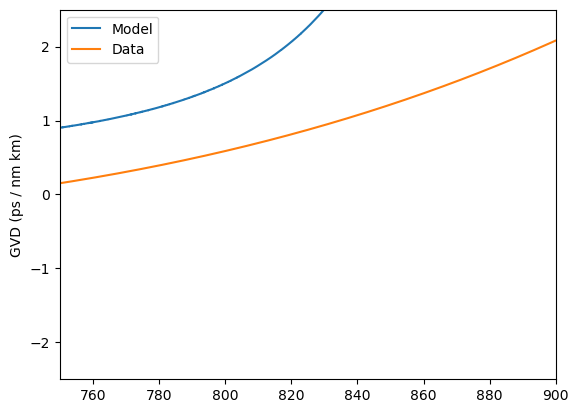

4.5714285714285715e-07
j value
2.2336218479462584
j1nz is
3.8317059702075125


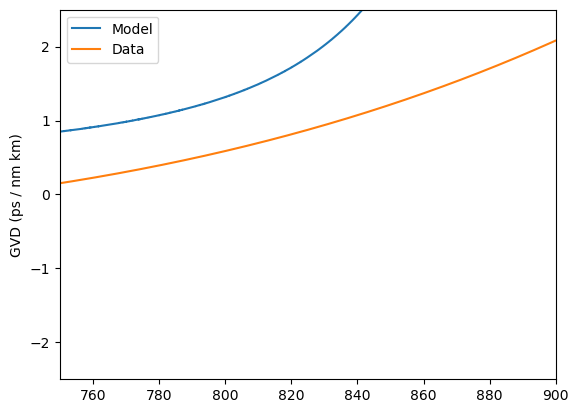

4.6428571428571427e-07
j value
2.2336510421688693
j1nz is
3.8317059702075125


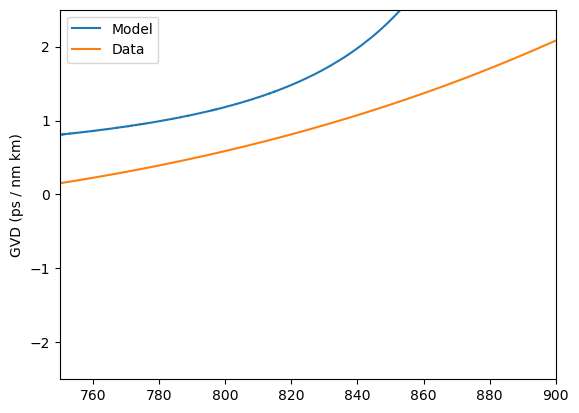

4.714285714285714e-07
j value
2.2336802177361923
j1nz is
3.8317059702075125


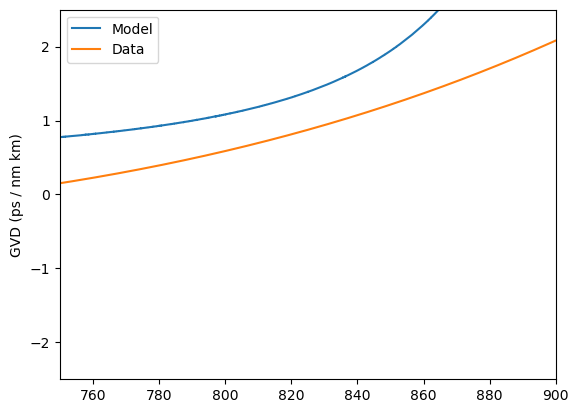

4.785714285714286e-07
j value
2.2337093746482273
j1nz is
3.8317059702075125


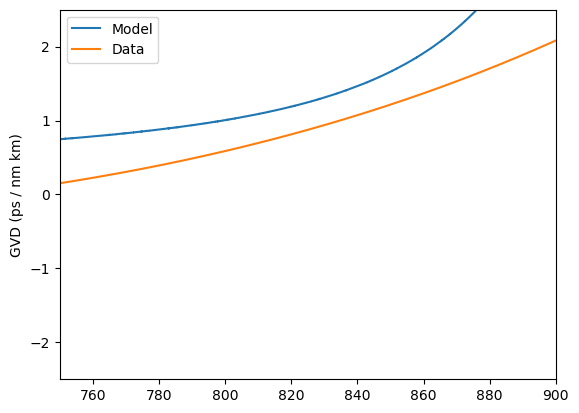

4.857142857142857e-07
j value
2.2337385129049743
j1nz is
3.8317059702075125


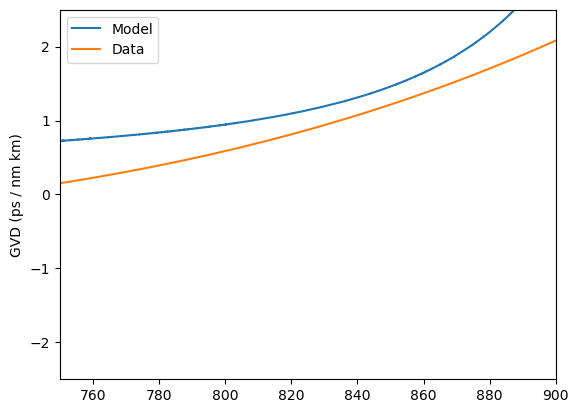

4.928571428571429e-07
j value
2.2337676325064333
j1nz is
3.8317059702075125


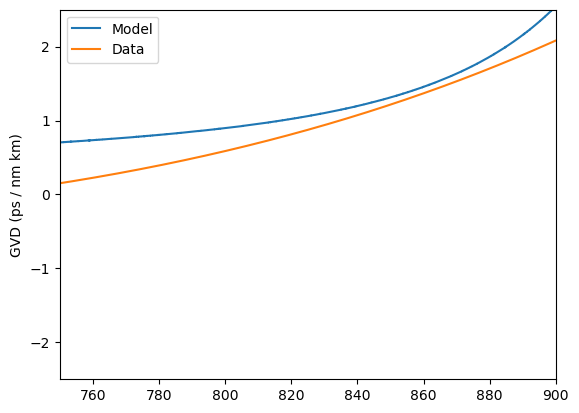

5e-07
j value
2.233796733452604
j1nz is
3.8317059702075125


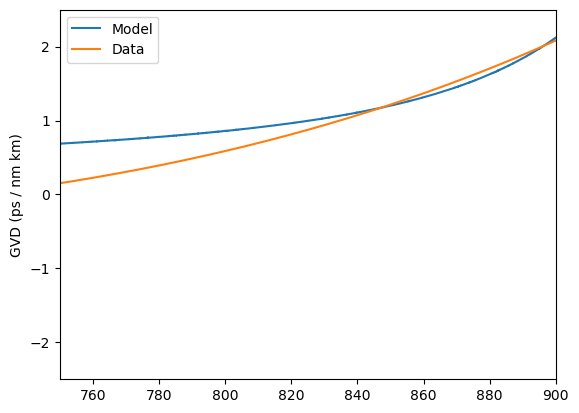

5.071428571428571e-07
j value
2.233825815743487
j1nz is
3.8317059702075125


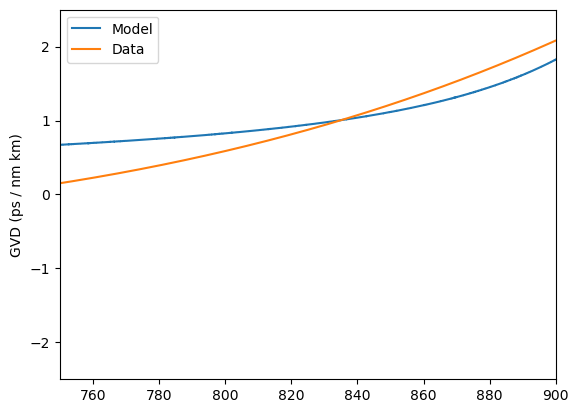

5.142857142857143e-07
j value
2.2338548793790816
j1nz is
3.8317059702075125


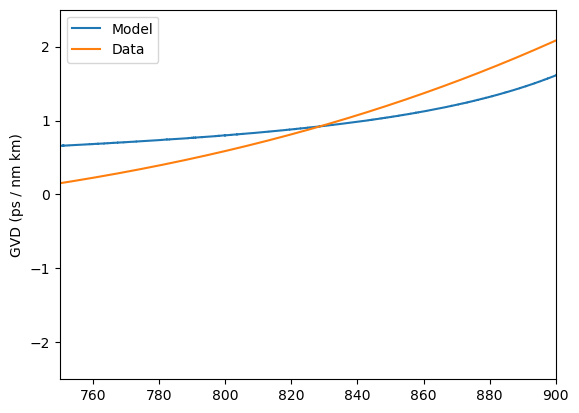

5.214285714285714e-07
j value
2.233883924359388
j1nz is
3.8317059702075125


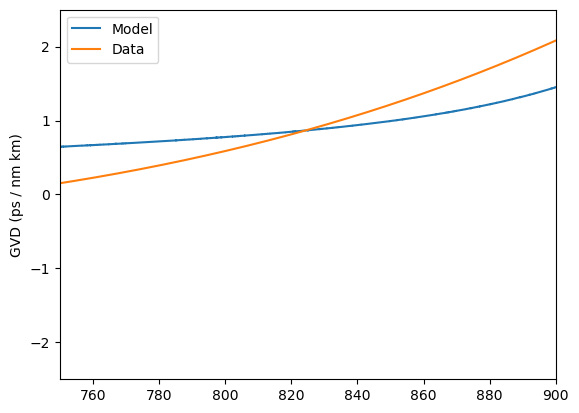

5.285714285714286e-07
j value
2.233912950684407
j1nz is
3.8317059702075125


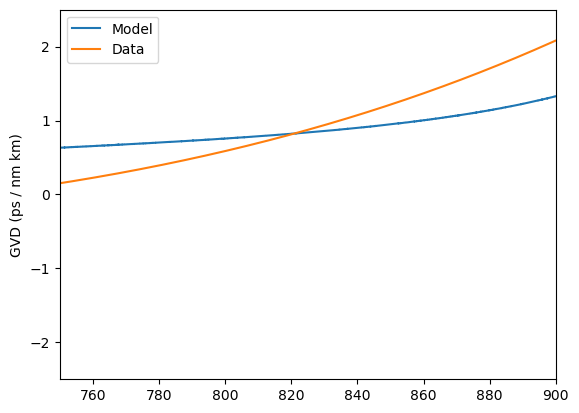

5.357142857142858e-07
j value
2.233941958354137
j1nz is
3.8317059702075125


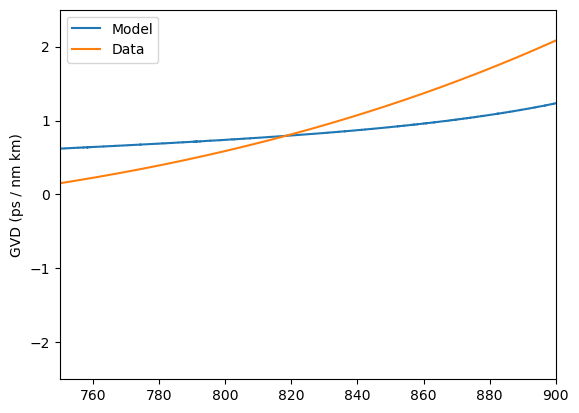

5.428571428571429e-07
j value
2.23397094736858
j1nz is
3.8317059702075125


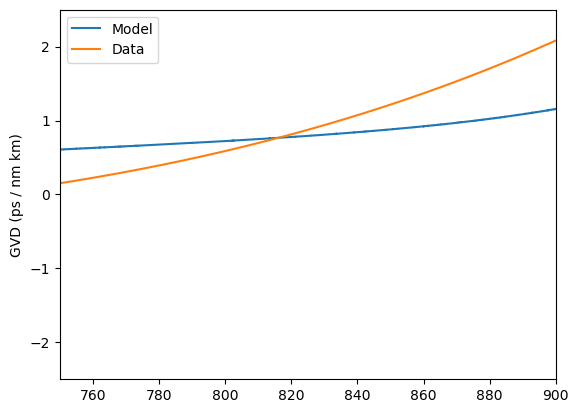

5.5e-07
j value
2.233999917727734
j1nz is
3.8317059702075125


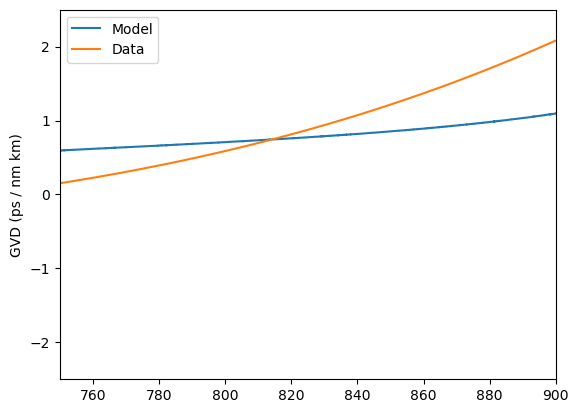

In [16]:
simulation_wavelengths = np.linspace(600, 1000, 10000)# min(wavelengths), max(wavelengths), 10000)
# index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=best_R, w=best_w,part="R")
ws = np.linspace(0.45e-6, 0.55e-6, 15)
for w in ws:
    print(w)
    index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=24e-6,w=w,part="R", normalised_gap=RefractiveIndexClass.RefractiveIndex.calculate_gamma(6, w, 24e-6, 0.7*24e-6))
    beta_HCF = beta_lambda_func(index, simulation_wavelengths)
    GVD_HCF = GVD_lambda_func(beta_HCF, simulation_wavelengths)
    plt.plot(simulation_wavelengths, np.array(GVD_HCF), label = "Model")
    plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
    plt.ylabel("GVD (ps / nm km)")
    plt.legend()
    plt.xlim([750,900])
    #plt.ylim([-10e-9, 10e-9])
    plt.ylim(-2.5, 2.5)
    plt.show()

2.3e-05
j value
2.2357536013413513
j1nz is
3.8317059702075125


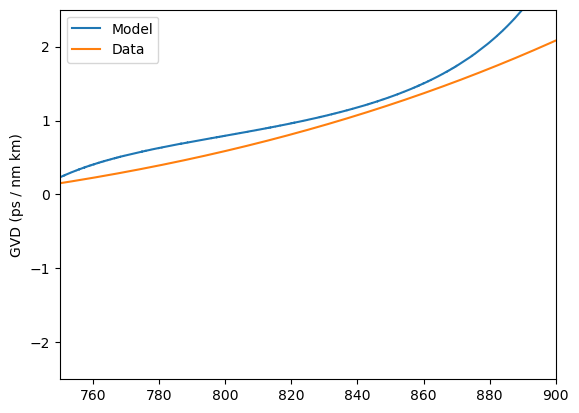

2.3142857142857142e-05
j value
2.235729771467938
j1nz is
3.8317059702075125


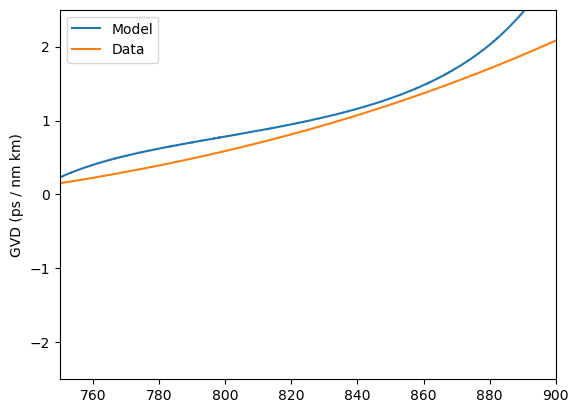

2.3285714285714287e-05
j value
2.2357062205453486
j1nz is
3.8317059702075125


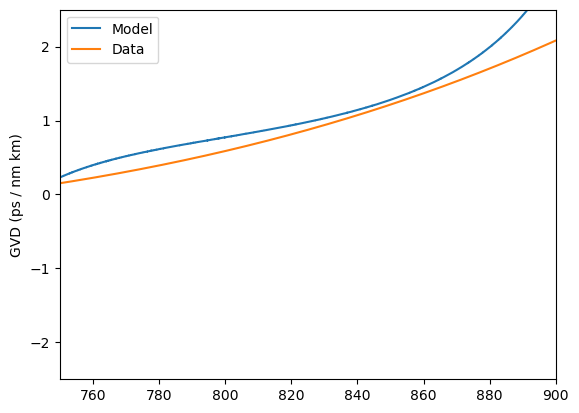

2.342857142857143e-05
j value
2.2356829437151835
j1nz is
3.8317059702075125


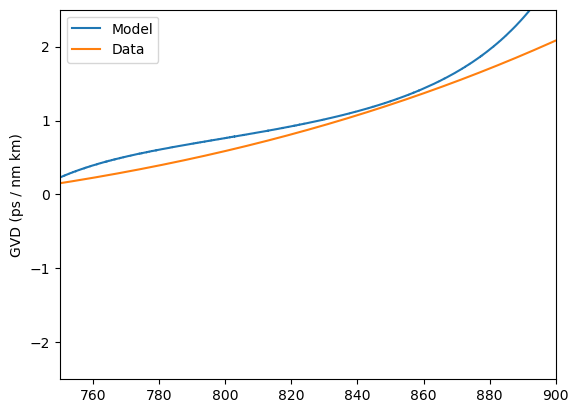

2.357142857142857e-05
j value
2.2356599362309337
j1nz is
3.8317059702075125


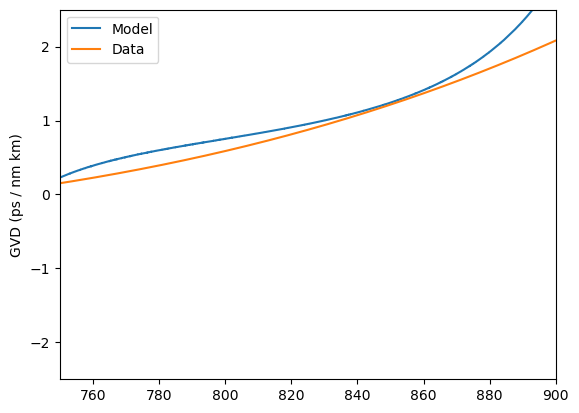

2.3714285714285713e-05
j value
2.235637193454789
j1nz is
3.8317059702075125


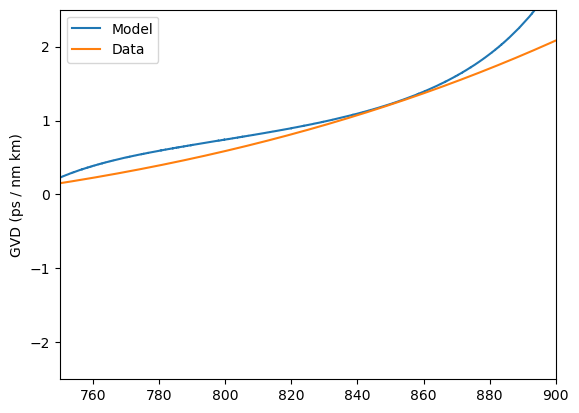

2.385714285714286e-05
j value
2.2356147108545508
j1nz is
3.8317059702075125


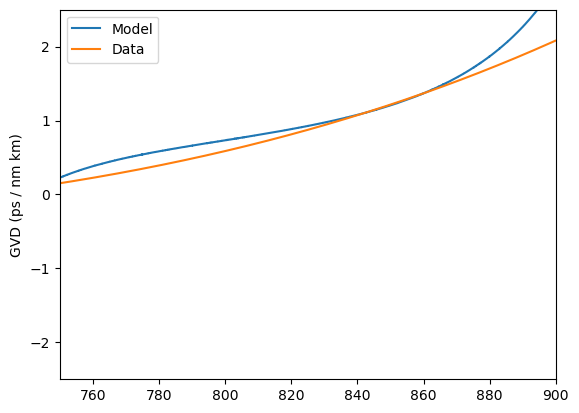

2.4e-05
j value
2.2355924840006507
j1nz is
3.8317059702075125


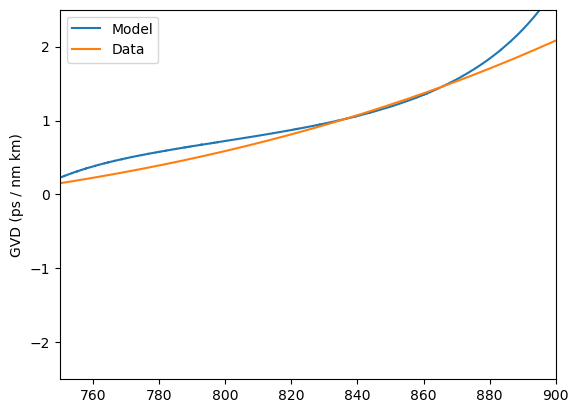

2.4142857142857143e-05
j value
2.2355705085632707
j1nz is
3.8317059702075125


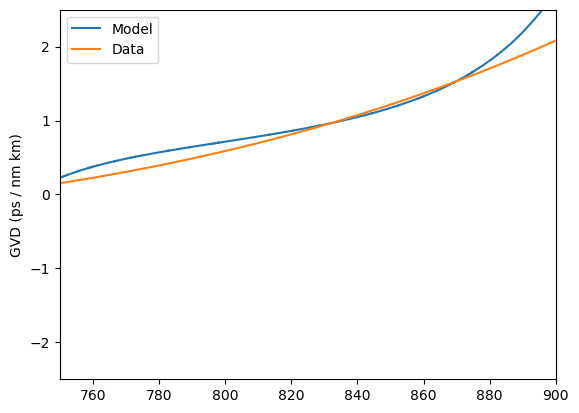

2.4285714285714288e-05
j value
2.235548780309556
j1nz is
3.8317059702075125


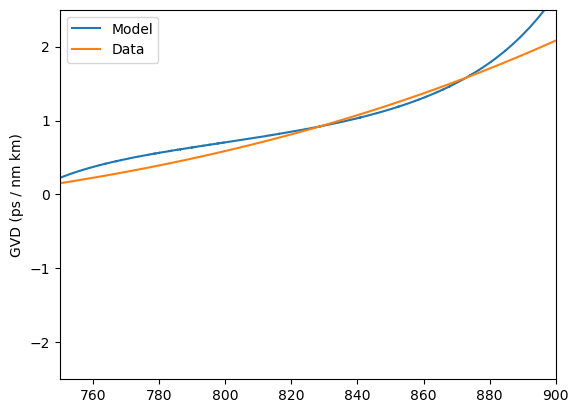

2.442857142857143e-05
j value
2.2355272951009257
j1nz is
3.8317059702075125


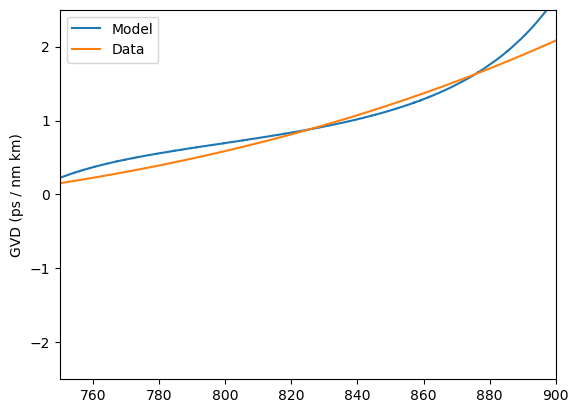

2.4571428571428572e-05
j value
2.235506048890467
j1nz is
3.8317059702075125


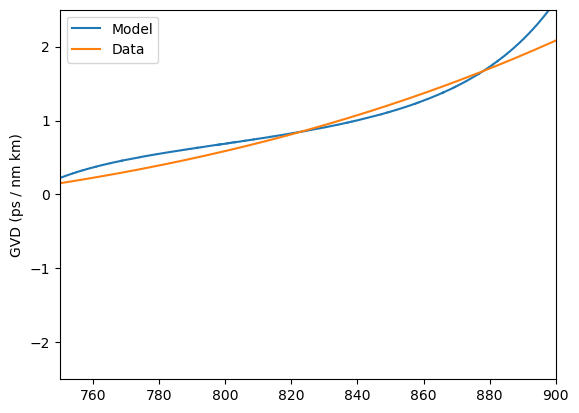

2.4714285714285714e-05
j value
2.235485037720417
j1nz is
3.8317059702075125


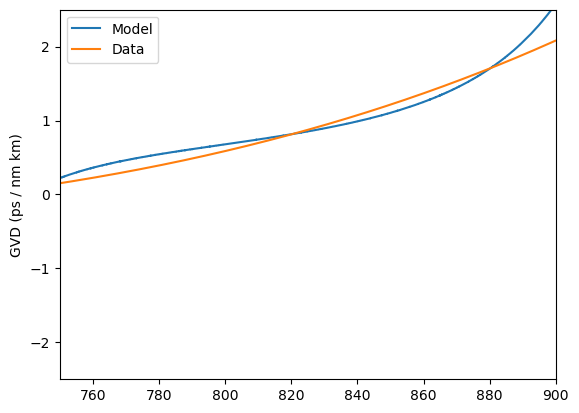

2.485714285714286e-05
j value
2.235464257719731
j1nz is
3.8317059702075125


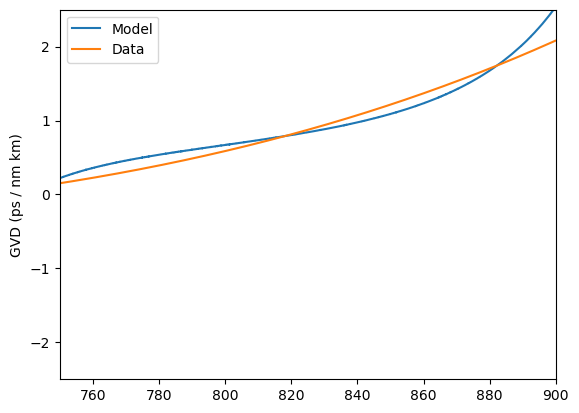

2.5e-05
j value
2.2354437051017197
j1nz is
3.8317059702075125


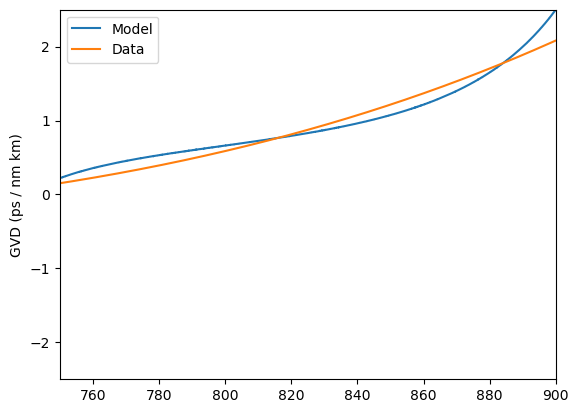

In [15]:
simulation_wavelengths = np.linspace(600, 1000, 10000)# min(wavelengths), max(wavelengths), 10000)
# index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=best_R, w=best_w,part="R")
Rs = np.linspace(23e-6, 25e-6, 15)
for R in Rs:
    print(R)
    index = RefractiveIndexClass.RefractiveIndex.HCF(wavelengths=simulation_wavelengths, R=R,w=9.5e-07,part="R", normalised_gap=RefractiveIndexClass.RefractiveIndex.calculate_gamma(6, 9.5e-07, R, 0.7*R))
    beta_HCF = beta_lambda_func(index, simulation_wavelengths)
    GVD_HCF = GVD_lambda_func(beta_HCF, simulation_wavelengths)
    plt.plot(simulation_wavelengths, np.array(GVD_HCF), label = "Model")
    plt.plot(wavelengths, GVD_lambda*1000, label = "Data")
    plt.ylabel("GVD (ps / nm km)")
    plt.legend()
    plt.xlim([750,900])
    #plt.ylim([-10e-9, 10e-9])
    plt.ylim(-2.5, 2.5)
    plt.show()